In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import model_functions as mf

from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree, DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [2]:
plot_colors = ['Cornflowerblue','#C43714','gold','#076B00','#8368CC','darkorange', 'navy', 'lightskyblue','#DA3287', '#FFFF31']
sns.set_palette(plot_colors)

In [3]:
df = pd.read_csv('../data/data_bank_account.csv')
print('data frame shape :', df.shape)
df.head()

data frame shape : (23524, 13)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# drop columns I don't need for my model
df.drop('year', axis=1, inplace=True)
df.drop('uniqueid', axis=1, inplace=True)
df.head()

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   bank_account            23524 non-null  object
 2   location_type           23524 non-null  object
 3   cellphone_access        23524 non-null  object
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


In [6]:
df['bank_account'] = df['bank_account'].map({'No': 0, 'Yes': 1})
df['location_type'] = df['location_type'].map({'Rural': 0, 'Urban': 1})
df.columns = df.columns.str.replace('location_type','Urban_location')
df['cellphone_access'] = df['cellphone_access'].map({'No': 0, 'Yes': 1})
df['gender_of_respondent'] = df['gender_of_respondent'].map({'Male': 0, 'Female': 1})

df['country'] =  df['country'].map({'Kenya':0, 'Rwanda':1, 'Tanzania':2, 'Uganda':3})

df['relationship_with_head']=df['relationship_with_head'].map({'Spouse':0,
                                                            'Head of Household':1,
                                                            'Other relative':2,
                                                            'Child':3,
                                                            'Parent':4,
                                                            'Other non-relatives':5})

df['marital_status'] =df['marital_status'].map({'Married/Living together':0,
                                                'Widowed':1,
                                                'Single/Never Married':2,
                                                'Divorced/Seperated':3,
                                                'Dont know':4})


df['education_level'] = df['education_level'].map({'Secondary education':0,
                                                   'No formal education':1,
                                                   'Vocational/Specialised training':2,
                                                   'Primary education':3,
                                                   'Tertiary education':4,
                                                   'Other/Dont know/RTA':5
                                                   }) 
  
df['job_type'] = df['job_type'].map({'Self employed':0,
                                     'Government Dependent':1,
                                     'Formally employed Private':2,
                                     'Informally employed':3,
                                     'Formally employed Government':4,
                                     'Farming and Fishing':5,
                                     'Remittance Dependent':6,
                                     'Other Income':7,
                                     'Dont Know/Refuse to answer':8,
                                     'No Income':9
                                     })

In [7]:
df[['country', 'bank_account', 'Urban_location', 'cellphone_access', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level','job_type']] = df[['country', 
                                                                                        'bank_account', 
                                                                                        'Urban_location', 
                                                                                        'cellphone_access', 
                                                                                        'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level','job_type']].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country                 23524 non-null  category
 1   bank_account            23524 non-null  category
 2   Urban_location          23524 non-null  category
 3   cellphone_access        23524 non-null  category
 4   household_size          23524 non-null  int64   
 5   age_of_respondent       23524 non-null  int64   
 6   gender_of_respondent    23524 non-null  category
 7   relationship_with_head  23524 non-null  category
 8   marital_status          23524 non-null  category
 9   education_level         23524 non-null  category
 10  job_type                23524 non-null  category
dtypes: category(9), int64(2)
memory usage: 576.1 KB


In [9]:
selected_features = df.columns.to_list()
selected_features.remove('bank_account')
selected_features

['country',
 'Urban_location',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [10]:

X = df[selected_features]
y = df['bank_account']

In [11]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    stratify=y)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16466, 10)
(7058, 10)
(16466,)
(7058,)


In [12]:
y_train.value_counts()

bank_account
0    14148
1     2318
Name: count, dtype: int64

In [13]:
y_test.value_counts()

bank_account
0    6064
1     994
Name: count, dtype: int64

## Decision Tree

Zum Einstieg ein einfaches Modell mit Standartparametern

In [14]:
dectree_model = mf.train_model(DecisionTreeClassifier,
                        X_train,
                        y_train,
                        class_weight = 'balanced', # important for the imbalanced data!!
                        criterion = "gini", 
                        min_samples_leaf = 5,
                        max_depth = 10, 
                        max_leaf_nodes = 10,
                        splitter = 'best')

In [15]:
dectree_dict = mf.model_scores_df(dectree_model, X_train, X_test, y_train, y_test , 'Basic_dectree_Model')
dectree_dict

{'model_name': 'Basic_dectree_Model',
 'train_accuracy': 0.75,
 'test_accuracy': 0.76,
 'train_gmean': 0.74,
 'test_gmean': 0.74,
 'train_sensitivity': 0.72,
 'test_sensitivity': 0.73,
 'train_specificity': 0.76,
 'test_specificity': 0.76}

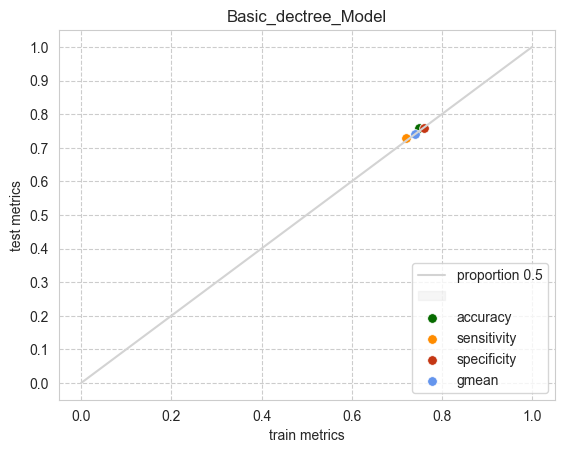

In [16]:
mf.metrics_line_scatterplot(dectree_dict)

Nice! Much better than KNN! :-)  
  
  Looking at the Tree:

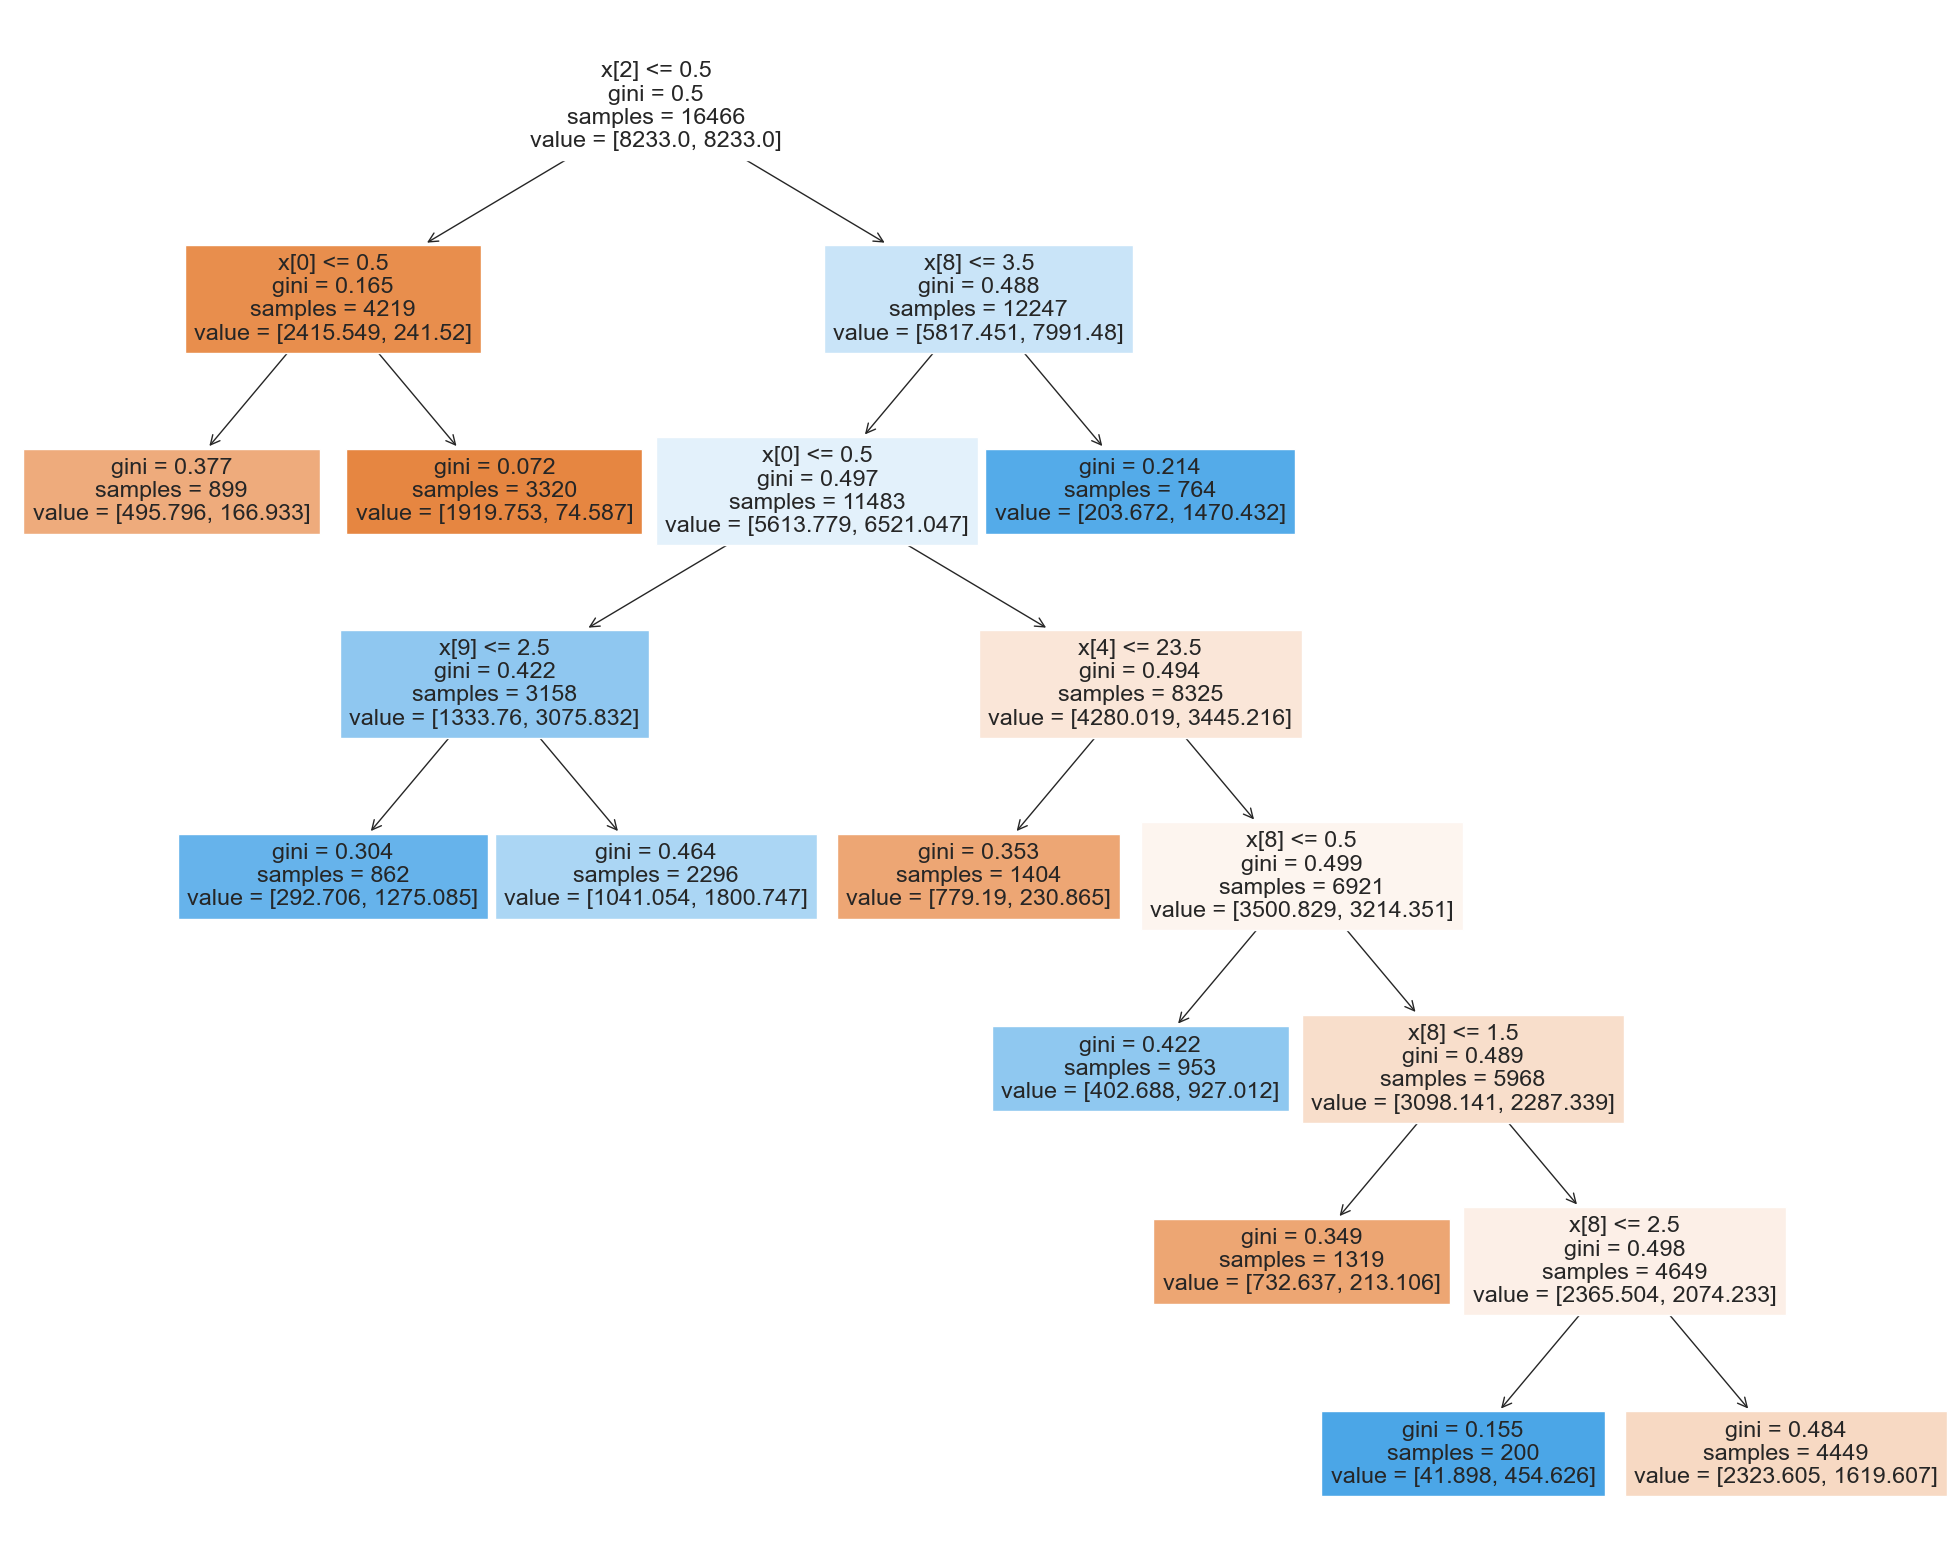

In [17]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dectree_model, filled=True)

In [18]:
dectree_error_lst = []
for depth in np.arange(5,11,1):
    for leaf in np.arange(6,11,1): 
        dectree = mf.train_model(DecisionTreeClassifier,
                        X_train,
                        y_train,
                        class_weight = 'balanced', # important for the imbalanced data!!
                        criterion = "gini", 
                        min_samples_leaf = 5,
                        max_depth = depth, 
                        max_leaf_nodes = leaf,
                        splitter = 'best')
        loop_name =  'dectree_depth_' + str(depth) + '_leaf_' + str(leaf)
        dectree_error_lst.append(mf.model_scores_df(dectree, X_train, X_test, y_train, y_test, loop_name))
        
dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df['delta_gmean'] = abs(dectree_error_df['train_gmean'] - dectree_error_df['test_gmean'])
dectree_error_df.sort_values(by = ['test_gmean', 'delta_gmean'], ascending=[False, True])

,model_name,train_accuracy,test_accuracy,train_gmean,test_gmean,train_sensitivity,test_sensitivity,train_specificity,test_specificity,delta_gmean
12,dectree_depth_7_leaf_8,0.75,0.76,0.74,0.74,0.72,0.73,0.76,0.76,0.00
13,dectree_depth_7_leaf_9,0.75,0.76,0.74,0.74,0.72,0.73,0.76,0.76,0.00
14,dectree_depth_7_leaf_10,0.75,0.76,0.74,0.74,0.72,0.73,0.76,0.76,0.00
17,dectree_depth_8_leaf_8,0.75,0.76,0.74,0.74,0.72,0.73,0.76,0.76,0.00
18,dectree_depth_8_leaf_9,0.75,0.76,0.74,0.74,0.72,0.73,0.76,0.76,0.00
19,dectree_depth_8_leaf_10,0.75,0.76,0.74,0.74,0.72,0.73,0.76,0.76,0.00
22,dectree_depth_9_leaf_8,0.75,0.76,0.74,0.74,0.72,0.73,0.76,0.76,0.00
23,dectree_depth_9_leaf_9,0.75,0.76,0.74,0.74,0.72,0.73,0.76,0.76,0.00
24,dectree_depth_9_leaf_10,0.75,0.76,0.74,0.74,0.72,0.73,0.76,0.76,0.00
27,dectree_depth_10_leaf_8,0.75,0.76,0.74,0.74,0.72,0.73,0.76,0.76,0.00


/Users/maritaschmidt/NEUE_FISCHE/ml_project_financial_inclusion/models/model_functions.py:226: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


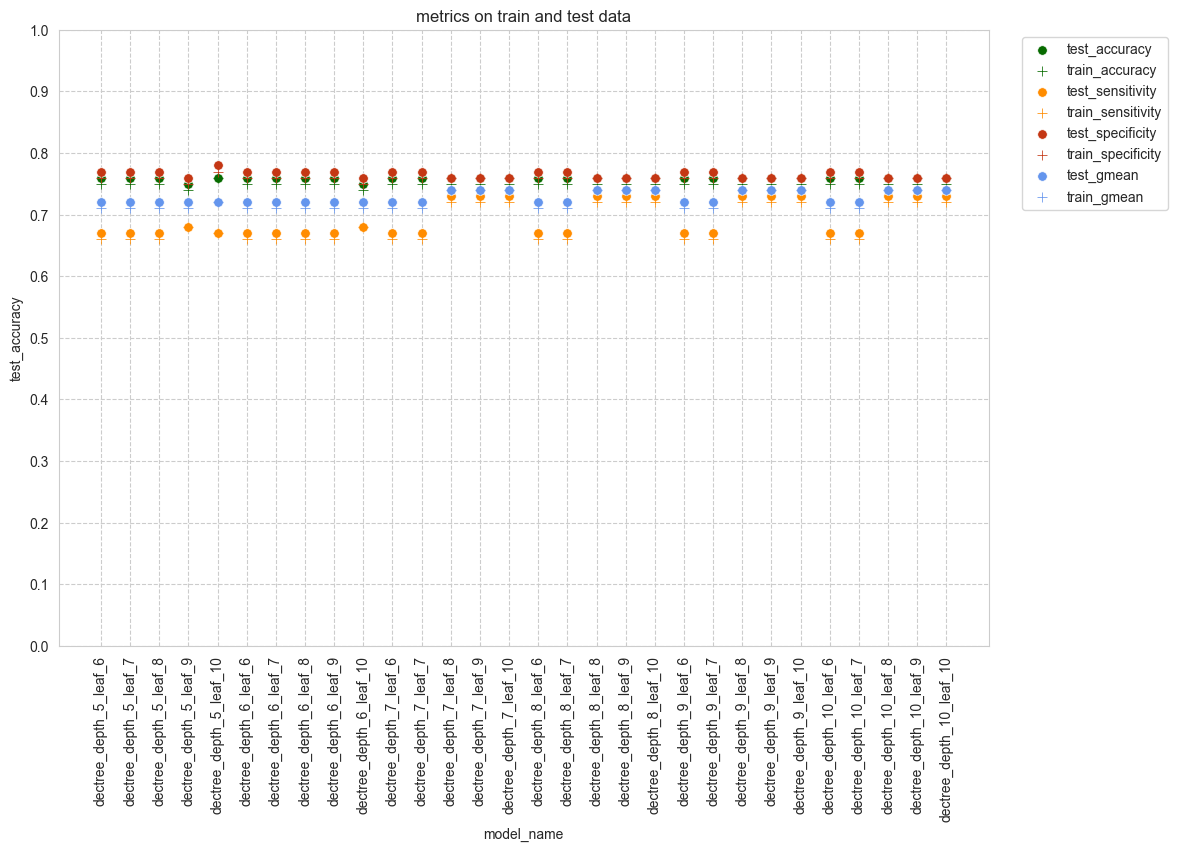

In [19]:
mf.metrics_comp_scatterplot(dectree_error_df)

The first well-balanced combination is depth=7, max_leaf=8, but depth=5, max_leaf=9 could also be looked at more closely. Both provide good sensitivity without reducing the specificity too much.  (Gmean is the highest)
  
  I kept adjusting the parameters in the loop, starting with 
  * for depth in np.arange(2,26,1)
  * for leaf in np.arange(2,26,1))

and from there I narrowed down the promising area further and further.
max_leaf_nodes often runs into saturation because the depth is limited.

Winner-Tree:

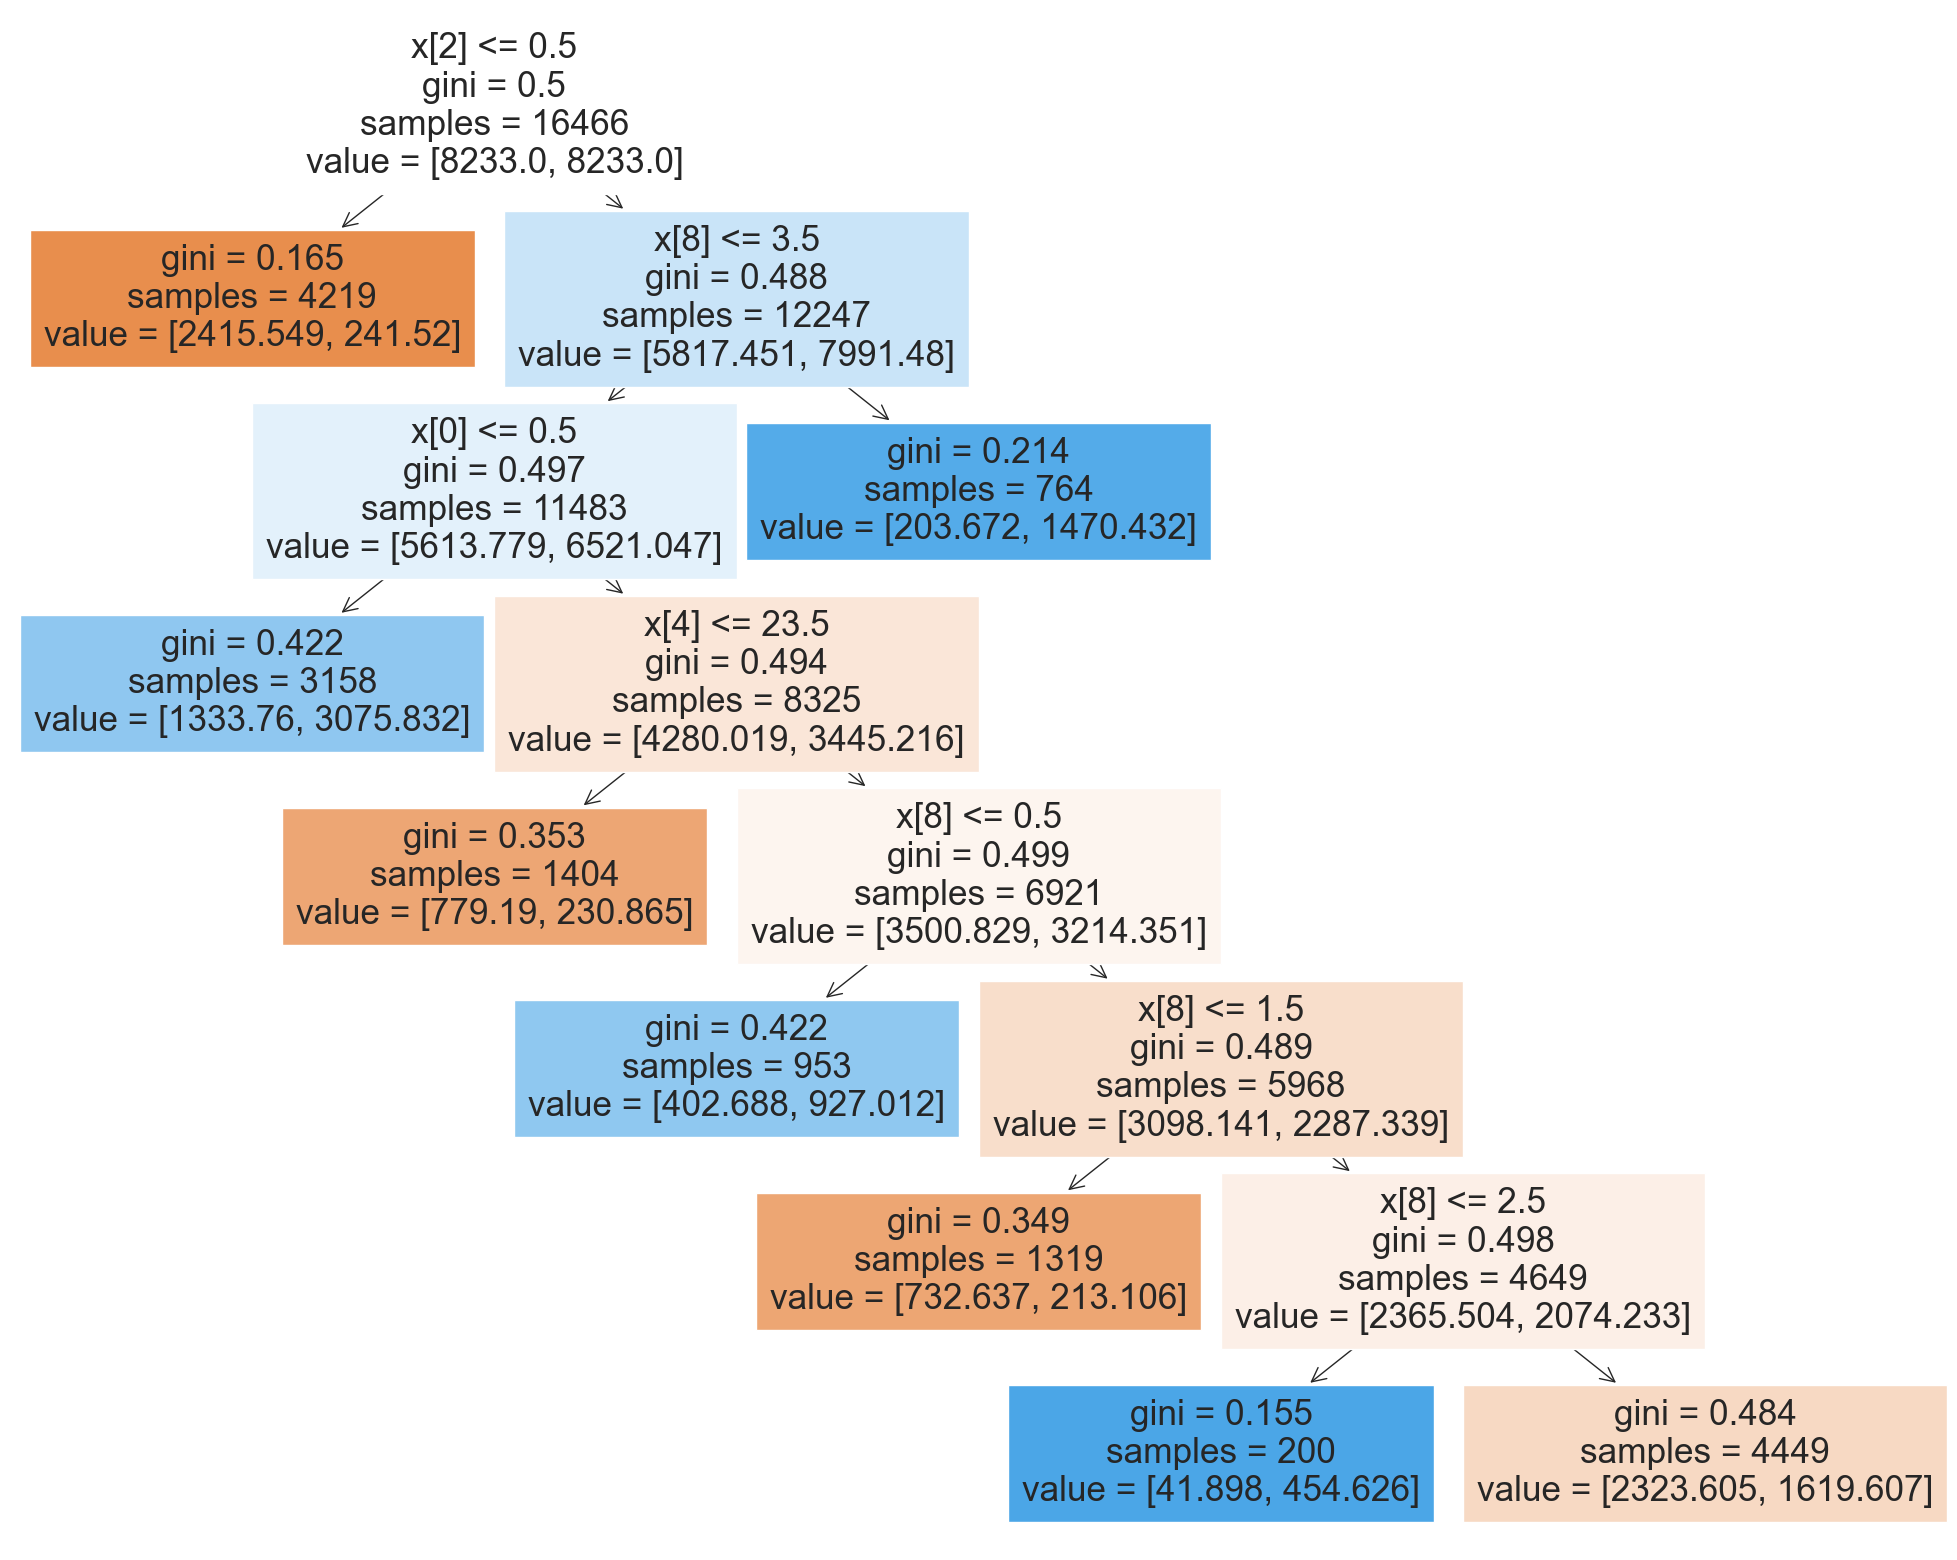

In [20]:
dectree_model_d7_ml8 = mf.train_model(DecisionTreeClassifier,
                        X_train,
                        y_train,
                        class_weight = 'balanced', # important for the imbalanced data!!
                        criterion = "gini", 
                        min_samples_leaf = 5,
                        max_depth = 7, 
                        max_leaf_nodes = 8,
                        splitter = 'best')

fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dectree_model_d7_ml8, filled=True)

In [21]:
dectree_d7_ml8_dict = mf.model_scores_df(dectree_model_d7_ml8, X_train, X_test, y_train, y_test , 'DecTree_d7_ml8')
dectree_d7_ml8_dict

{'model_name': 'DecTree_d7_ml8',
 'train_accuracy': 0.75,
 'test_accuracy': 0.76,
 'train_gmean': 0.74,
 'test_gmean': 0.74,
 'train_sensitivity': 0.72,
 'test_sensitivity': 0.73,
 'train_specificity': 0.76,
 'test_specificity': 0.76}

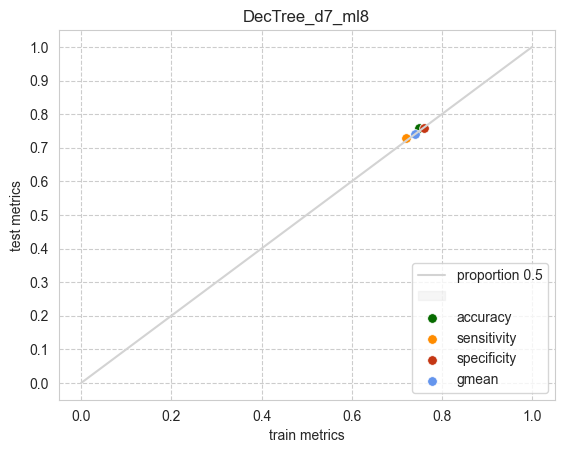

In [22]:
mf.metrics_line_scatterplot(dectree_d7_ml8_dict)
plt.savefig('../plots_and_pictures/model_dectree_d7_ml8_scatter.png', transparent=False)

In [23]:
dectree_d7_ml8_cmx = confusion_matrix(y_test, dectree_model_d7_ml8.predict(X_test))
dectree_d7_ml8_cmx

array([[4635, 1429],
       [ 273,  721]])

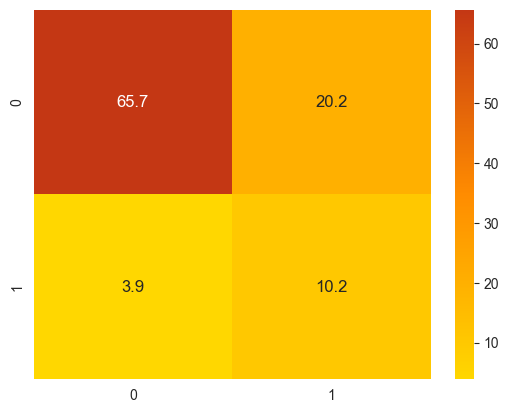

In [24]:
mf.conf_matrix_heatmap_perc(dectree_d7_ml8_cmx)

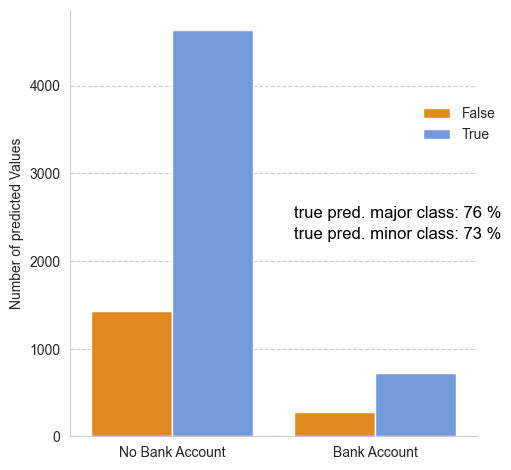

In [25]:
mf.conf_matrix_as_bar_abs(dectree_d7_ml8_cmx)
plt.savefig('../plots_and_pictures/model_dectree_d7_ml8_barplot.png', transparent=False)

## Random Forest

In [26]:
rand_forest = mf.train_model(RandomForestClassifier,
                        X_train,
                        y_train)

In [27]:
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
randforest_error_lst = []
for estim in [100]:
    for depth in np.arange(30,31,1):
        for leaf in np.arange(25,106,5):
            rand_forest = mf.train_model(RandomForestClassifier,
                            X_train,
                            y_train,
                            class_weight = 'balanced', # important for the imbalanced data!!
                            criterion = "gini", 
                            min_samples_leaf = 5,
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            random_state=123, 
                            min_samples_split = 2,
                            n_estimators = estim,
                            max_features = 'sqrt',
                            n_jobs=-1, verbose = 1)
            loop_name =  'forest_estim_'+ str(estim) + '_depth_' + str(depth) + '_leaf_' + str(leaf)
            randforest_error_lst.append(mf.model_scores_df(rand_forest, X_train, X_test, y_train, y_test, loop_name))
            
randforest_error_df = pd.DataFrame(randforest_error_lst)
randforest_error_df['delta_gmean'] = abs(randforest_error_df['train_gmean'] - randforest_error_df['test_gmean'])
randforest_error_df.sort_values(by = ['test_gmean', 'delta_gmean'], ascending=[False, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

,model_name,train_accuracy,test_accuracy,train_gmean,test_gmean,train_sensitivity,test_sensitivity,train_specificity,test_specificity,delta_gmean
0,forest_estim_100_depth_30_leaf_25,0.77,0.77,0.77,0.77,0.78,0.77,0.76,0.76,0.00
1,forest_estim_100_depth_30_leaf_30,0.77,0.77,0.77,0.77,0.78,0.77,0.77,0.77,0.00
2,forest_estim_100_depth_30_leaf_35,0.77,0.77,0.78,0.77,0.78,0.77,0.77,0.77,0.01
3,forest_estim_100_depth_30_leaf_40,0.78,0.77,0.78,0.77,0.79,0.77,0.77,0.77,0.01
4,forest_estim_100_depth_30_leaf_45,0.78,0.77,0.78,0.77,0.79,0.77,0.78,0.77,0.01
5,forest_estim_100_depth_30_leaf_50,0.78,0.78,0.78,0.77,0.79,0.76,0.78,0.78,0.01
6,forest_estim_100_depth_30_leaf_55,0.78,0.78,0.79,0.77,0.79,0.76,0.78,0.78,0.02
7,forest_estim_100_depth_30_leaf_60,0.79,0.78,0.79,0.77,0.79,0.76,0.79,0.78,0.02
8,forest_estim_100_depth_30_leaf_65,0.79,0.78,0.79,0.77,0.79,0.76,0.79,0.79,0.02
9,forest_estim_100_depth_30_leaf_70,0.79,0.78,0.79,0.77,0.79,0.76,0.79,0.79,0.02


/Users/maritaschmidt/NEUE_FISCHE/ml_project_financial_inclusion/models/model_functions.py:226: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


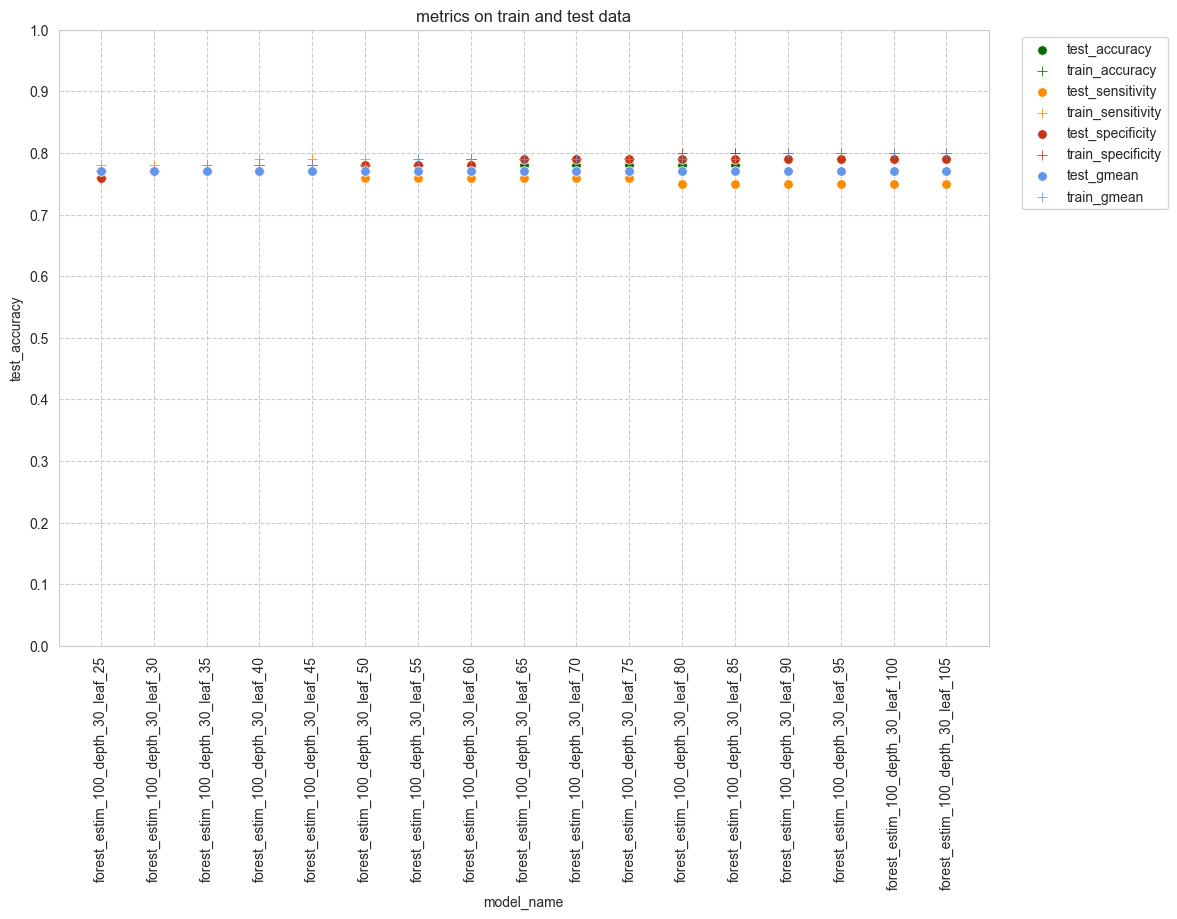

In [29]:
mf.metrics_comp_scatterplot(randforest_error_df)

starting from:
* for estim in [20,50,100]:
* for depth in np.arange(5,31,5):
* for leaf in np.arange(5,31,5):

below max_leaf = 30 the specificity is smaller than the sensitivity (major class is predicted worse than minor class) above max_leaf = 65 it goes in the other direction again. 

In the max_leaf = (30-45) range, both classes are predicted equally well, so I take forest_estim_100_depth_30_leaf_35 as the winner.

Winner Forest:

In [30]:
rand_forest_d30_l35 = mf.train_model(RandomForestClassifier,
                            X_train,
                            y_train,
                            class_weight = 'balanced', # important for the imbalanced data!!
                            criterion = "gini", 
                            min_samples_leaf = 5,
                            max_depth = 30, 
                            max_leaf_nodes = 35,
                            random_state=123, 
                            min_samples_split = 2,
                            n_estimators = 100,
                            max_features = 'sqrt',
                            n_jobs=-1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [31]:
rand_forest_d30_l35_dict = mf.model_scores_df(rand_forest_d30_l35, X_train, X_test, y_train, y_test , 'rand_forest_d30_l35')
rand_forest_d30_l35_dict

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


{'model_name': 'rand_forest_d30_l35',
 'train_accuracy': 0.77,
 'test_accuracy': 0.77,
 'train_gmean': 0.78,
 'test_gmean': 0.77,
 'train_sensitivity': 0.78,
 'test_sensitivity': 0.77,
 'train_specificity': 0.77,
 'test_specificity': 0.77}

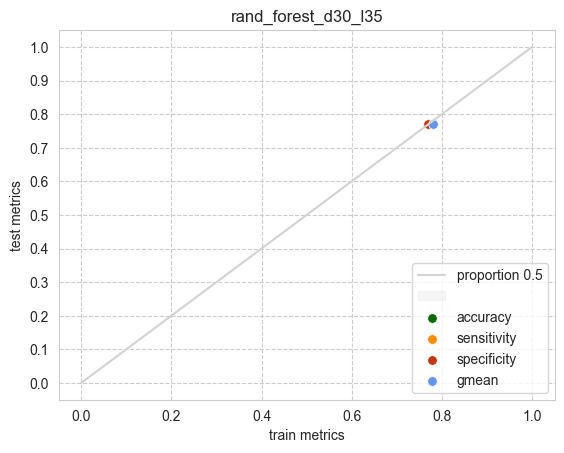

In [32]:
mf.metrics_line_scatterplot(rand_forest_d30_l35_dict)
plt.savefig('../plots_and_pictures/model_rand_forest_d30_l35_scatter.png', transparent=False)

In [33]:
rand_forest_d30_l35_cmx = confusion_matrix(y_test, rand_forest_d30_l35.predict(X_test))
rand_forest_d30_l35_cmx

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[4673, 1391],
       [ 229,  765]])

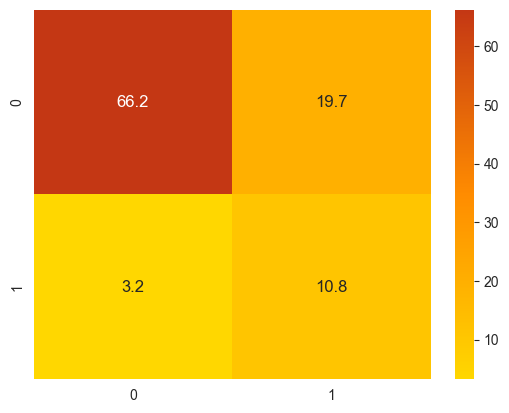

In [34]:
mf.conf_matrix_heatmap_perc(rand_forest_d30_l35_cmx)

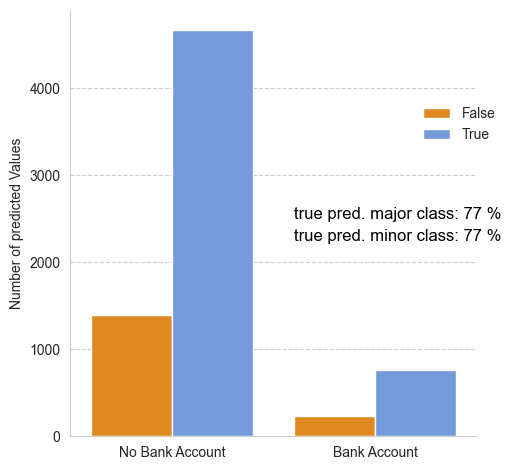

In [35]:
mf.conf_matrix_as_bar_abs(rand_forest_d30_l35_cmx)
plt.savefig('../plots_and_pictures/model_rand_forest_d30_l35_barplot.png', transparent=False)

In [36]:
bar_colors = ['darkorange', 'cornflowerblue']

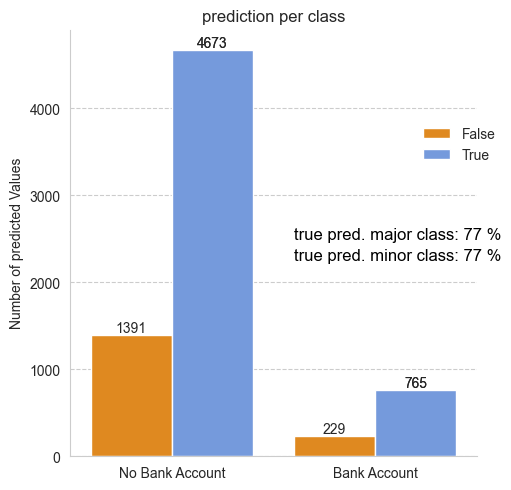

In [37]:
def conf_matrix_as_bar_abs(confusion_matrix_local):
    """
    function creates a plot with True and False predicted Values as bar
    out of a confusion matrix with percent value

    Args:
        confusion_matrix_local (_type_): _description_
    """

    local_df = pd.DataFrame([{'class':'0',
                                   'statement': True,
                                   'pred': confusion_matrix_local[0][0]},
                                   {'class':'0',
                                   'statement': False,
                                   'pred':confusion_matrix_local[0][1] },
                                   {'class':'1',
                                   'statement': True,
                                   'pred':confusion_matrix_local[1][1] },
                                   {'class':'1',
                                   'statement': False,
                                   'pred':confusion_matrix_local[1][0] }])

    pred_class_0_true = int(round((confusion_matrix_local[0][0] / (confusion_matrix_local[0][0] + confusion_matrix_local[0][1]))*100))
    pred_class_0_false = int(round((confusion_matrix_local[0][1] / (confusion_matrix_local[0][0] + confusion_matrix_local[0][1]))*100))
    
    pred_class_1_false = int(round((confusion_matrix_local[1][0] / (confusion_matrix_local[1][0] + confusion_matrix_local[1][1]))*100))
    pred_class_1_true = int(round((confusion_matrix_local[1][1] / (confusion_matrix_local[1][0] + confusion_matrix_local[1][1]))*100))
    sns.set_palette(bar_colors)

    b = sns.catplot(data=local_df, x='class',y = 'pred', hue = 'statement', kind='bar')

    b.set(xlabel='',
        ylabel='Number of predicted Values',
        title='prediction per class')
    sns.move_legend(b, "upper right", title=None,  bbox_to_anchor=(0.9, 0.8))
    ax = b.facet_axis(0,0)
    b.set_xticklabels(['No Bank Account', 'Bank Account'])
    
    for c in ax.containers:
        ax.bar_label(c,fmt ='{:.0f}' , label_type='edge')
    ax.bar_label(c,fmt ='{:.0f}' , label_type='edge')
    

    #ax.text(-0.25,50.0, f'{pred_class_0_false} %', {'fontstyle':'normal','size': '12', 'color':'black'}, alpha = 1.0)
    ax.text(0.6,2500.0, f'true pred. major class: {pred_class_0_true} %', {'fontstyle':'normal','size': '12', 'color':'black'}, alpha = 1.0)
    #ax.text(0.73,50.0, f'{pred_class_1_false} %', {'fontstyle':'normal','size': '12', 'color':'black'}, alpha = 1.0)
    ax.text(0.6,2250.0, f'true pred. minor class: {pred_class_1_true} %', {'fontstyle':'normal','size': '12', 'color':'black'}, alpha = 1.0)
    return

conf_matrix_as_bar_abs(rand_forest_d30_l35_cmx)